In [1]:
# Update sklearn to prevent version mismatches
!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
!pip install joblib

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("Resources/exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()
df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6991 entries, 0 to 6990
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_disposition    6991 non-null   object 
 1   koi_fpflag_nt      6991 non-null   int64  
 2   koi_fpflag_ss      6991 non-null   int64  
 3   koi_fpflag_co      6991 non-null   int64  
 4   koi_fpflag_ec      6991 non-null   int64  
 5   koi_period         6991 non-null   float64
 6   koi_period_err1    6991 non-null   float64
 7   koi_period_err2    6991 non-null   float64
 8   koi_time0bk        6991 non-null   float64
 9   koi_time0bk_err1   6991 non-null   float64
 10  koi_time0bk_err2   6991 non-null   float64
 11  koi_impact         6991 non-null   float64
 12  koi_impact_err1    6991 non-null   float64
 13  koi_impact_err2    6991 non-null   float64
 14  koi_duration       6991 non-null   float64
 15  koi_duration_err1  6991 non-null   float64
 16  koi_duration_err2  6991 

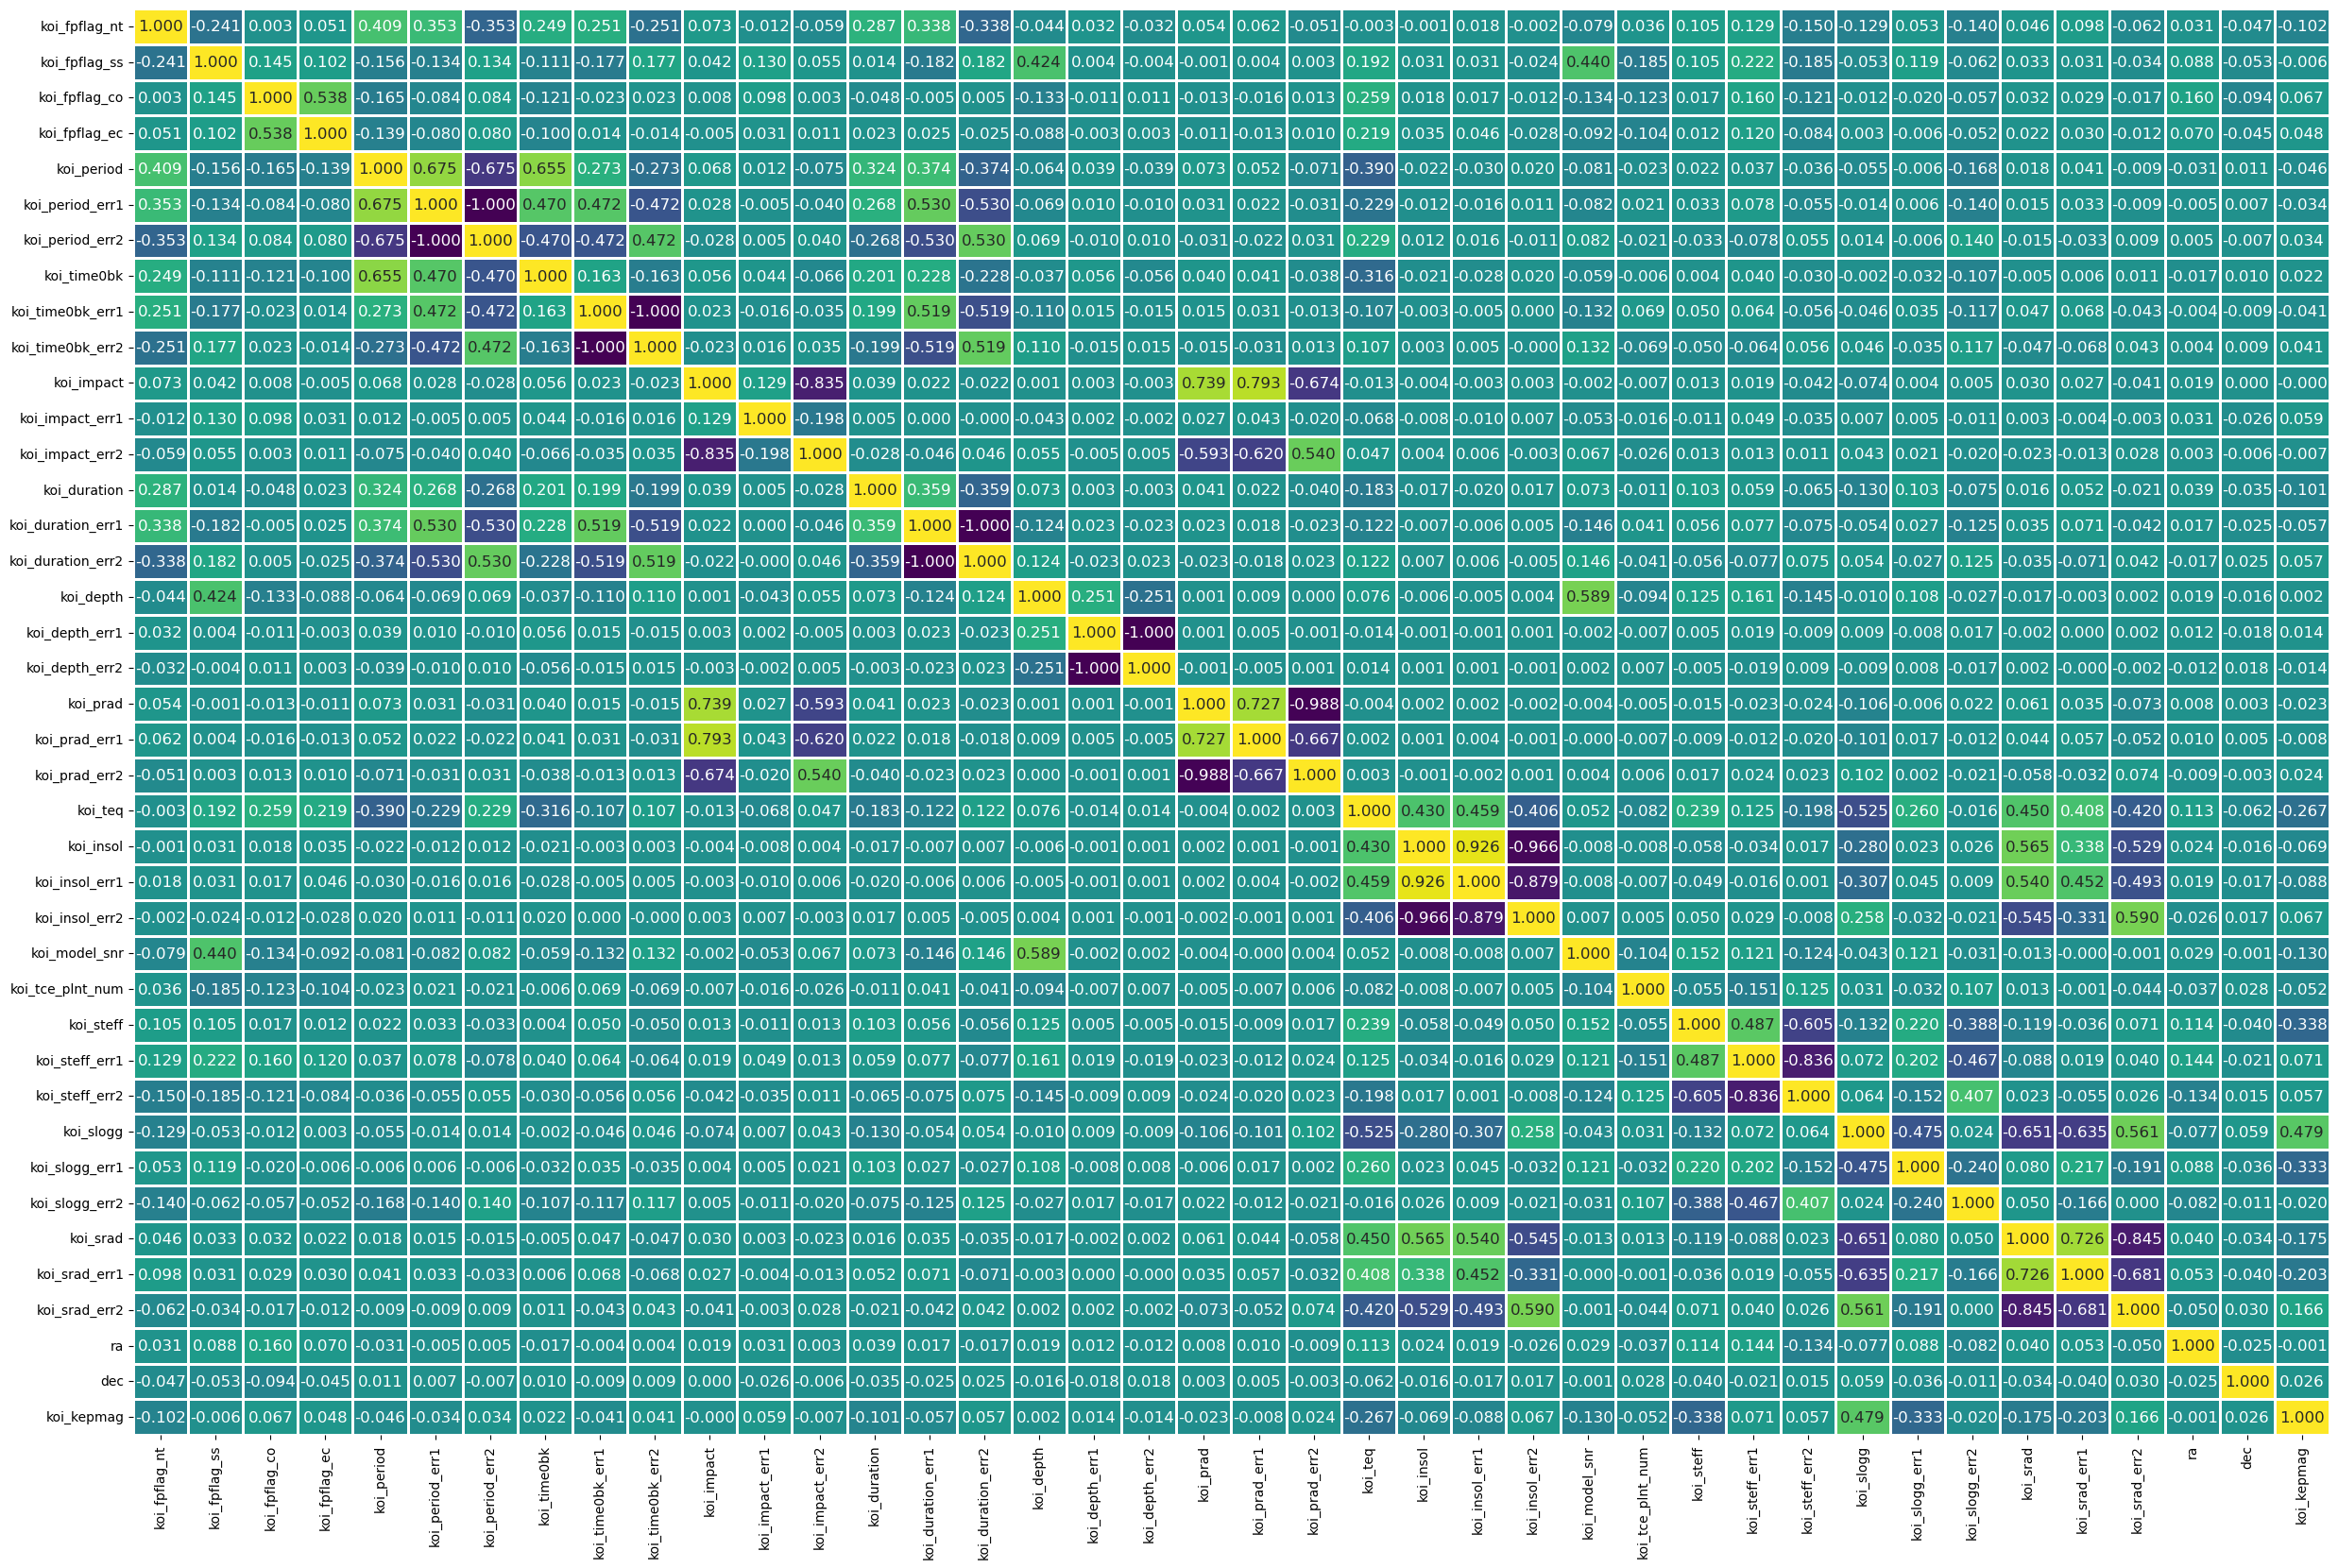

In [6]:
corr_map = df.corr()

plt.figure(figsize=(30, 20), dpi=100) 
_ = sns.heatmap(corr_map, annot=True, annot_kws={"fontsize":12}, linecolor='white', \
            linewidth=1, fmt='.3f', cmap="viridis", cbar=False)

# Select your features (columns)

In [7]:
# Set features. This will also be used as your x values.
selected_features = df.drop("koi_disposition", axis=1)

# Create a Train Test Split

Use `koi_disposition` for the y values

In [8]:
y = df["koi_disposition"]
print(selected_features.shape, y.shape)

(6991, 40) (6991,)


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, random_state=42, stratify = y)
X_train.head()

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
6080,1,0,0,0,12.496435,2.213000e-04,-2.213000e-04,132.035800,0.014300,-0.014300,...,-286,3.805,0.390,-0.130,2.730,0.535,-1.248,289.23080,44.412483,13.054
3001,0,0,0,0,11.615625,1.528000e-04,-1.528000e-04,131.968430,0.008230,-0.008230,...,-72,4.083,0.368,-0.092,1.453,0.218,-0.510,293.52756,41.111439,15.162
570,0,1,0,0,10.980246,6.930000e-07,-6.930000e-07,137.137607,0.000053,-0.000053,...,-159,4.462,0.098,-0.182,0.897,0.238,-0.119,282.79764,43.578129,14.212
4897,1,0,0,0,466.908240,1.194000e-02,-1.194000e-02,136.373100,0.019000,-0.019000,...,-146,4.456,0.102,-0.361,0.867,0.448,-0.103,297.65436,43.178551,15.202
625,0,1,1,1,1.061933,1.250000e-06,-1.250000e-06,133.850441,0.000978,-0.000978,...,-167,3.975,0.259,-0.111,1.851,0.383,-0.575,288.90253,44.632992,12.953


# Pre-processing

Scale the data using the MinMaxScaler and perform some feature selection

In [10]:
# Scale your data
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

X_mmscaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_mmscaler.transform(X_train)
X_test_scaled = X_mmscaler.transform(X_test)

# Label-encode data
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [11]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=50)
clf = clf.fit(X_train_scaled, encoded_y_train)
clf.feature_importances_

array([0.12914467, 0.1545656 , 0.12799084, 0.05152534, 0.01780963,
       0.01460545, 0.01291792, 0.01186069, 0.01964238, 0.02125191,
       0.01171182, 0.01228121, 0.01093991, 0.0181412 , 0.03184272,
       0.0291081 , 0.02130555, 0.01270058, 0.0117051 , 0.0133341 ,
       0.01279164, 0.01355957, 0.0136456 , 0.00929575, 0.00918949,
       0.00872926, 0.0366381 , 0.00901958, 0.0107138 , 0.02729976,
       0.01887832, 0.01019748, 0.01170846, 0.01342523, 0.00850207,
       0.01023487, 0.00915129, 0.01218276, 0.01026194, 0.0101903 ])

In [12]:
feature_df = pd.DataFrame({"feature" : X_train.columns,
    "importance" : clf.feature_importances_    
})
top20 = list(feature_df.sort_values(by=["importance"], ascending=False).head(20)["feature"])

In [13]:
X_train_top20 = X_train[top20]
X_test_top20 = X_test[top20]
X_train_top20.head()

,koi_fpflag_ss,koi_fpflag_nt,koi_fpflag_co,koi_fpflag_ec,koi_model_snr,koi_duration_err1,koi_duration_err2,koi_steff_err1,koi_depth,koi_time0bk_err2,koi_time0bk_err1,koi_steff_err2,koi_duration,koi_period,koi_period_err1,koi_teq,koi_prad_err2,koi_slogg_err2,koi_prad,koi_period_err2
6080,0,1,0,0,141.5,1.2000,-1.2000,190,271.7,-0.014300,0.014300,-286,84.32000,12.496435,2.213000e-04,1397,-25.30,-0.130,55.34,-2.213000e-04
3001,0,0,0,0,8.8,0.3620,-0.3620,88,191.2,-0.008230,0.008230,-72,2.23300,11.615625,1.528000e-04,905,-1.00,-0.092,2.84,-1.528000e-04
570,1,0,0,0,1555.4,0.0034,-0.0034,159,50078.0,-0.000053,0.000053,-159,3.74464,10.980246,6.930000e-07,821,-2.91,-0.182,21.94,-6.930000e-07
4897,0,1,0,0,5.4,0.6930,-0.6930,185,660.0,-0.019000,0.019000,-146,2.64000,466.908240,1.194000e-02,210,-0.26,-0.361,2.19,-1.194000e-02
625,1,0,1,1,80.2,0.0386,-0.0386,167,133.6,-0.000978,0.000978,-167,2.14290,1.061933,1.250000e-06,2508,-0.71,-0.111,2.29,-1.250000e-06


# Train the Model



In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=500)
model.fit(X_train_top20, encoded_y_train)
predictions = model.predict(X_test_top20)
print(predictions)

print(f"Training Data Score: {model.score(X_train_top20, encoded_y_train)}")
print(f"Testing Data Score: {model.score(X_test_top20, encoded_y_test)}")

[0 2 2 ... 2 2 1]
Training Data Score: 1.0
Testing Data Score: 0.9004576659038902


In [18]:
# Classification report
from sklearn.metrics import classification_report
model_rpt = classification_report(encoded_y_test, predictions, 
                            target_names = ["CONFIRMED", "FALSE POSITIVE", "CANDIDATE"])
print(model_rpt)

# Write report output
rpt_file = open("model_RandomForestRpt.txt", "w")
rpt_file.write(model_rpt)
rpt_file.close()

                precision    recall  f1-score   support

     CONFIRMED       0.83      0.77      0.80       422
FALSE POSITIVE       0.80      0.84      0.82       450
     CANDIDATE       0.98      1.00      0.99       876

      accuracy                           0.90      1748
     macro avg       0.87      0.87      0.87      1748
  weighted avg       0.90      0.90      0.90      1748



# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [16]:
# Create the GridSearch estimator along with a parameter object containing the values to adjust
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
        'max_features': ['auto', 'sqrt'],              # 'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth' : [4,5,6],
        'n_estimators':[200,500]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [17]:
# Train the model with GridSearch
grid.fit(X_train_top20, encoded_y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.866 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.870 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.874 total time=   0.6s
[CV 4/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.865 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=200;, score=0.855 total time=   0.6s
[CV 1/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.862 total time=   1.5s
[CV 2/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.867 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=4, max_features=auto, n_estimators=500;, score=0.872 total time=   1.5s
[CV 4/5] END criterion=gini, max_depth=4, max_feat

GridSearchCV(estimator=RandomForestClassifier(n_estimators=500),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 500]},
             verbose=3)

In [43]:

rpt_file = open("model_RandomForestRpt.txt", "a")
params = grid.best_params_
scores = grid.best_score_
rpt_file.write(f"\nBest Params : {params}")
rpt_file.write(f"\nBest Scores : {scores}")
rpt_file.close()

print(params)
print(scores)

{'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'n_estimators': 200}
0.8767865069604641


# Save the Model

In [39]:
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'model_RandomForest.sav'
joblib.dump(model, filename)

['model_RandomForest.sav']